In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.metrics import r2_score
import warnings

In [3]:
bidhannagar = pd.read_csv('C:/Users/shova/iCloudDrive/Kolkata_data/Work/Semi_processed/Bidhannagar.csv')    # reads the bidhannagar file
bidhannagar.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,AT,AQI,AQI_Standard
0,2019-08-21,11.24,43.98,180.59,9.30,6.10,0.25,15.18,30.25,200.59,Poor
1,2019-08-22,21.28,45.70,83.86,5.42,8.01,0.18,36.86,29.28,103.86,Moderately Polluted
2,2019-08-23,7.80,19.51,180.59,118.91,2.12,0.20,43.98,28.81,200.59,Poor
3,2019-08-24,7.48,19.47,277.32,232.41,2.93,0.18,40.97,27.42,297.32,Poor
4,2019-08-25,7.10,16.46,33.16,38.57,1.47,0.18,62.44,27.42,62.44,Satisfactory


In [4]:
bidhannagar['Date'] = pd.to_datetime(bidhannagar['Date'], format="%Y-%m-%d") # converts the date values to proper date format from string for plotting purposes
bidhannagar["month"] = bidhannagar["Date"].dt.month
bidhannagar["week"] = bidhannagar["Date"].dt.strftime('%V').astype('int64')
bidhannagar["week_day"] = bidhannagar["Date"].dt.weekday
bidhannagar.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,AT,AQI,AQI_Standard,month,week,week_day
0,2019-08-21,11.24,43.98,180.59,9.30,6.10,0.25,15.18,30.25,200.59,Poor,8,34,2
1,2019-08-22,21.28,45.70,83.86,5.42,8.01,0.18,36.86,29.28,103.86,Moderately Polluted,8,34,3
2,2019-08-23,7.80,19.51,180.59,118.91,2.12,0.20,43.98,28.81,200.59,Poor,8,34,4
3,2019-08-24,7.48,19.47,277.32,232.41,2.93,0.18,40.97,27.42,297.32,Poor,8,34,5
4,2019-08-25,7.10,16.46,33.16,38.57,1.47,0.18,62.44,27.42,62.44,Satisfactory,8,34,6


In [5]:
bidhannagar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1229 non-null   datetime64[ns]
 1   PM2.5         1229 non-null   float64       
 2   PM10          1229 non-null   float64       
 3   NO2           1229 non-null   float64       
 4   NH3           1229 non-null   float64       
 5   SO2           1229 non-null   float64       
 6   CO            1229 non-null   float64       
 7   Ozone         1229 non-null   float64       
 8   AT            1229 non-null   float64       
 9   AQI           1229 non-null   float64       
 10  AQI_Standard  1229 non-null   object        
 11  month         1229 non-null   int64         
 12  week          1229 non-null   int64         
 13  week_day      1229 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 134.5+ KB


## KNN Regression

In [6]:
model_knn = KNeighborsRegressor(n_neighbors=5)

### PM 2.5

In [7]:
data_pm25 = pd.DataFrame()
data_pm25["month"] = bidhannagar["month"]
data_pm25["week"] = bidhannagar["week"]
data_pm25["week_day"] = bidhannagar["week_day"]
data_pm25["PM2.5"] = bidhannagar["PM2.5"]
cols = data_pm25.columns
data_pm25.head()

,month,week,week_day,PM2.5
0,8,34,2,11.24
1,8,34,3,21.28
2,8,34,4,7.80
3,8,34,5,7.48
4,8,34,6,7.10


In [8]:
# shuffling the data set
data_pm25 = data_pm25.sample(frac=1).reset_index()
data_pm25 = data_pm25.drop('index', axis=1)
data_pm25.head()

,month,week,week_day,PM2.5
0,5,18,2,23.73
1,9,36,5,11.60
2,2,7,5,102.31
3,11,48,4,51.25
4,2,8,3,101.88


In [9]:
duplicate_pm25 = data_pm25.copy()

In [10]:
#normalizing the dataset
data_pm25 = preprocessing.normalize(data_pm25,norm='l2')
data_pm25 = pd.DataFrame(data_pm25, columns=cols)

In [11]:
X_pm25 = data_pm25.drop('PM2.5', axis=1) #data basically refere to the values in the independent columns
X_pm25.shape

(1229, 3)

In [12]:
y_pm25 = data_pm25.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)
y_pm25.shape      

(1229, 1)

In [13]:
X_train = X_pm25.head(983)
X_test = X_pm25.tail(246)
y_train = y_pm25.head(983)
y_test = y_pm25.tail(246)

In [14]:
bidhannagar_pm25_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [15]:
predictions_pm25 = bidhannagar_pm25_knn.predict(X_test)

In [16]:
r2 = r2_score(y_test, predictions_pm25)
print('r2 score for  model is', r2)

r2 score for  model is 0.9985975654303806


In [17]:
#RSME - Root Mean Square Error
predictions_pm25 = predictions_pm25.reshape(246,1)
np.sqrt(((predictions_pm25 - y_test)**2).mean())

PM2.5    0.010532
dtype: float64

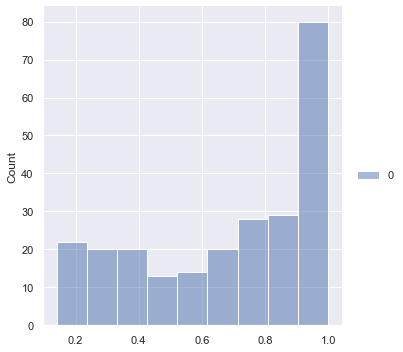

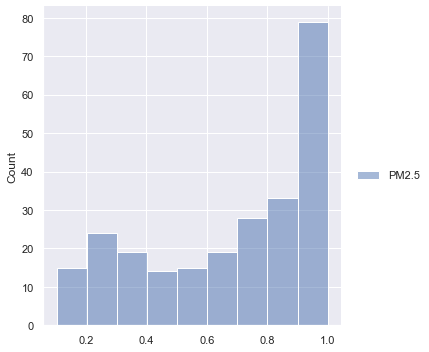

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_pm25)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

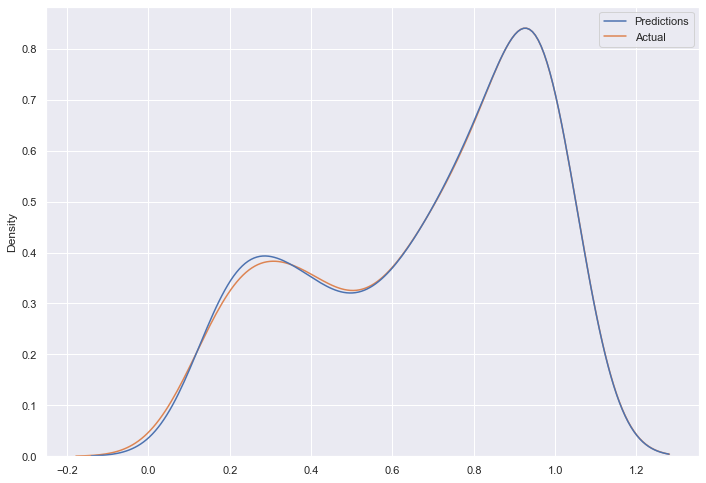

In [19]:
results = pd.DataFrame(predictions_pm25, columns = ['Predictions'])
results["Actual"] = list(y_test["PM2.5"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### PM10

In [20]:
data_pm10 = pd.DataFrame()
data_pm10["month"] = bidhannagar["month"]
data_pm10["week"] = bidhannagar["week"]
data_pm10["week_day"] = bidhannagar["week_day"]
data_pm10["PM10"] = bidhannagar["PM10"]
cols = data_pm10.columns
data_pm10.head()

,month,week,week_day,PM10
0,8,34,2,43.98
1,8,34,3,45.70
2,8,34,4,19.51
3,8,34,5,19.47
4,8,34,6,16.46


In [21]:
# shuffling the data set
data_pm10 = data_pm10.sample(frac=1).reset_index()
data_pm10 = data_pm10.drop('index', axis=1)
data_pm10.head()

,month,week,week_day,PM10
0,7,29,6,44.63
1,8,32,0,18.33
2,3,12,2,98.72
3,1,4,5,112.13
4,4,16,6,30.77


In [22]:
duplicate_pm10 = data_pm10.copy()

In [23]:
#normalizing the dataset
data_pm10 = preprocessing.normalize(data_pm10,norm='l2')
data_pm10 = pd.DataFrame(data_pm10, columns=cols)

In [24]:
X_pm10 = data_pm10.drop('PM10', axis=1) #data basically refere to the values in the independent columns
y_pm10 = data_pm10.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [25]:
X_train = X_pm10.head(983)
X_test = X_pm10.tail(246)
y_train = y_pm10.head(983)
y_test = y_pm10.tail(246)

In [26]:
bidhannagar_pm10_model_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [27]:
predictions_pm10 = bidhannagar_pm10_model_knn.predict(X_test)

In [28]:
r2 = r2_score(y_test, predictions_pm10)
print('r2 score for   model is', r2)

r2 score for   model is 0.9992518064574717


In [29]:
predictions_pm10.shape

(246,)

In [30]:
#RSME - Root Mean Square Error
predictions4 = predictions_pm10.reshape(246,1)
np.sqrt(((predictions4 - y_test)**2).mean())

PM10    0.004487
dtype: float64

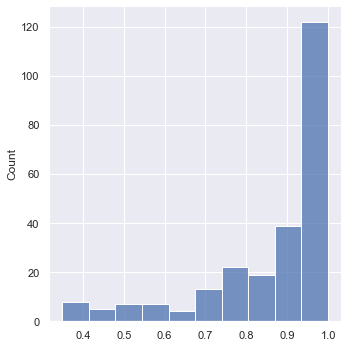

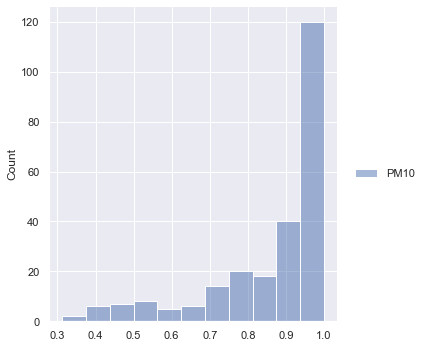

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_pm10)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

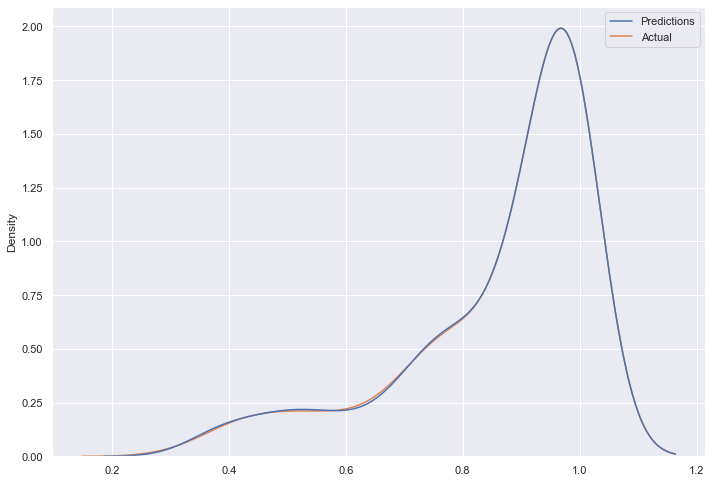

In [32]:
results = pd.DataFrame(predictions_pm10, columns = ['Predictions'])
results["Actual"] = list(y_test["PM10"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### NO2

In [33]:
data_no2 = pd.DataFrame()
data_no2["month"] = bidhannagar["month"]
data_no2["week"] = bidhannagar["week"]
data_no2["week_day"] = bidhannagar["week_day"]
data_no2["NO2"] = bidhannagar["NO2"]
cols = data_no2.columns
data_no2.head()

,month,week,week_day,NO2
0,8,34,2,180.59
1,8,34,3,83.86
2,8,34,4,180.59
3,8,34,5,277.32
4,8,34,6,33.16


In [34]:
# shuffling the data set
data_no2 = data_no2.sample(frac=1).reset_index()
data_no2 = data_no2.drop('index', axis=1)
data_no2.head()

,month,week,week_day,NO2
0,5,19,3,29.08
1,9,37,0,12.68
2,12,50,5,17.37
3,6,25,2,5.21
4,6,23,2,17.90


In [35]:
duplicate_no2 = data_no2.copy()

In [36]:
#normalizing the dataset
data_no2 = preprocessing.normalize(data_no2,norm='l2')
data_no2 = pd.DataFrame(data_no2, columns=cols)

In [37]:
X_no2 = data_no2.drop('NO2', axis=1) #data basically refere to the values in the independent columns
y_no2 = data_no2.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [38]:
X_train = X_no2.head(983)
X_test = X_no2.tail(246)
y_train = y_no2.head(983)
y_test = y_no2.tail(246)

In [39]:
bidhannagar_no2_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [40]:
predictions_no2 = bidhannagar_no2_knn.predict(X_test)

In [41]:
r2 = r2_score(y_test, predictions_no2)
print('r2 score for   model is', r2)

r2 score for   model is 0.9978731460503338


In [42]:
predictions_no2.shape

(246,)

In [43]:
#RSME - Root Mean Square Error
predictions5 = predictions_no2.reshape(246,1)
np.sqrt(((predictions5 - y_test)**2).mean())

NO2    0.013229
dtype: float64

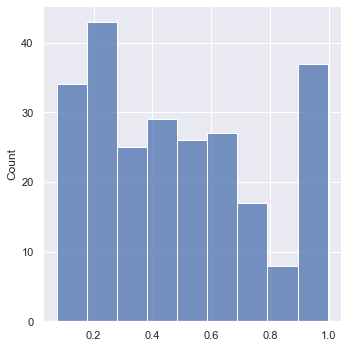

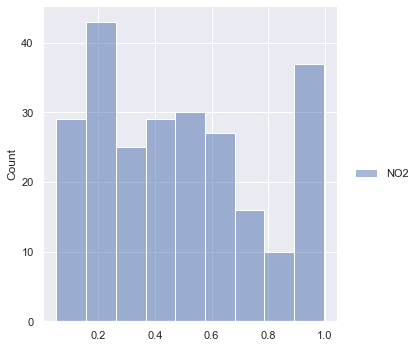

In [44]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_no2)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

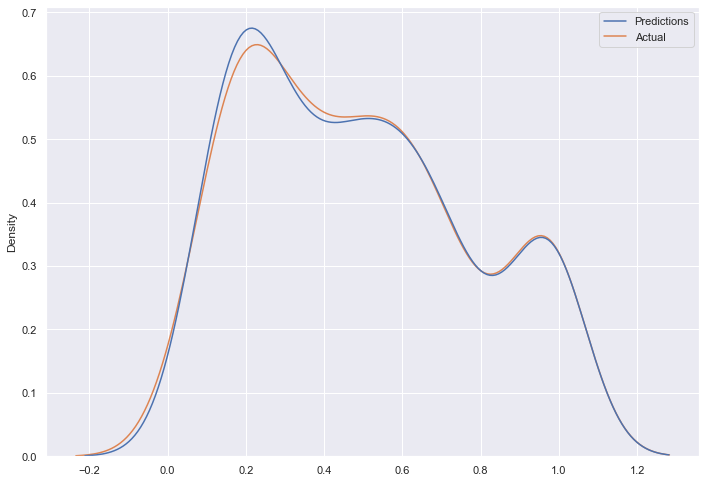

In [45]:
results = pd.DataFrame(predictions_no2, columns = ['Predictions'])
results["Actual"] = list(y_test["NO2"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### NH3

In [46]:
data_nh3 = pd.DataFrame()
data_nh3["month"] = bidhannagar["month"]
data_nh3["week"] = bidhannagar["week"]
data_nh3["week_day"] = bidhannagar["week_day"]
data_nh3["NH3"] = bidhannagar["NH3"]
cols = data_nh3.columns
data_nh3.head()

,month,week,week_day,NH3
0,8,34,2,9.30
1,8,34,3,5.42
2,8,34,4,118.91
3,8,34,5,232.41
4,8,34,6,38.57


In [47]:
# shuffling the data set
data_nh3 = data_nh3.sample(frac=1).reset_index()
data_nh3 = data_nh3.drop('index', axis=1)
data_nh3.head()

,month,week,week_day,NH3
0,12,48,4,230.37
1,1,4,1,18.02
2,9,40,0,9.90
3,1,3,6,20.40
4,3,9,6,20.23


In [48]:
duplicate_nh3 = data_nh3.copy()

In [49]:
#normalizing the dataset
data_nh3 = preprocessing.normalize(data_nh3,norm='l2')
data_nh3 = pd.DataFrame(data_nh3, columns=cols)

In [50]:
X_nh3 = data_nh3.drop('NH3', axis=1) #data basically refere to the values in the independent columns
y_nh3 = data_nh3.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [51]:
X_train = X_nh3.head(983)
X_test = X_nh3.tail(246)
y_train = y_nh3.head(983)
y_test = y_nh3.tail(246)

In [52]:
bidhannagar_nh3_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [53]:
predictions_nh3 = bidhannagar_nh3_knn.predict(X_test)

In [54]:
r2 = r2_score(y_test, predictions_nh3)
print('r2 score for   model is', r2)

r2 score for   model is 0.9981232544594721


In [55]:
predictions_nh3.shape

(246,)

In [56]:
#RSME - Root Mean Square Error
predictions5 = predictions_nh3.reshape(246,1)
np.sqrt(((predictions5 - y_test)**2).mean())

NH3    0.011537
dtype: float64

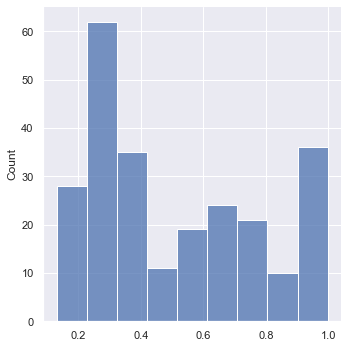

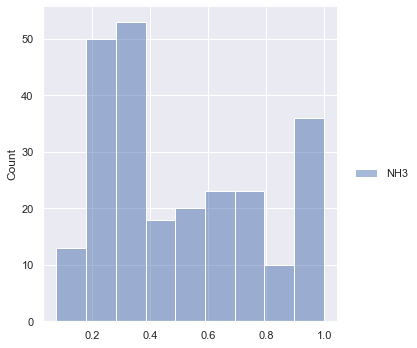

In [57]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_nh3)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

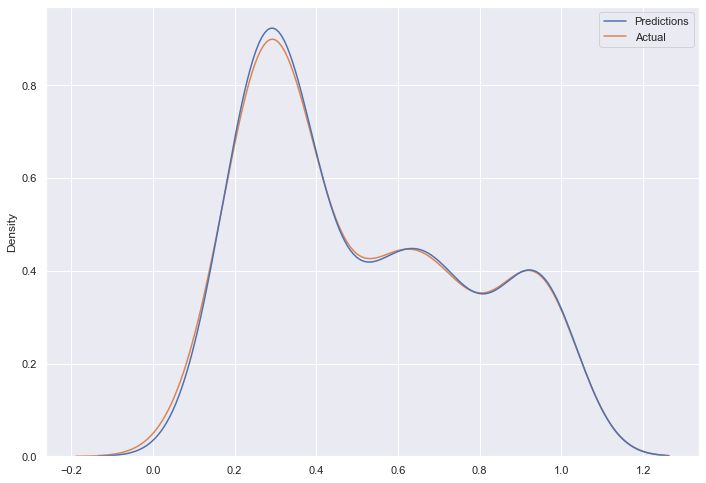

In [58]:
results = pd.DataFrame(predictions_nh3, columns = ['Predictions'])
results["Actual"] = list(y_test["NH3"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### SO2

In [59]:
data_so2 = pd.DataFrame()
data_so2["month"] = bidhannagar["month"]
data_so2["week"] = bidhannagar["week"]
data_so2["week_day"] = bidhannagar["week_day"]
data_so2["SO2"] = bidhannagar["SO2"]
cols = data_so2.columns
data_so2.head()

,month,week,week_day,SO2
0,8,34,2,6.10
1,8,34,3,8.01
2,8,34,4,2.12
3,8,34,5,2.93
4,8,34,6,1.47


In [60]:
# shuffling the data set
data_so2 = data_so2.sample(frac=1).reset_index()
data_so2 = data_so2.drop('index', axis=1)
data_so2.head()

,month,week,week_day,SO2
0,1,4,4,19.14
1,9,36,3,5.90
2,4,15,4,21.22
3,5,20,5,7.02
4,2,8,1,23.98


In [61]:
duplicate_so2 = data_so2.copy()

In [62]:
#normalizing the dataset
data_so2 = preprocessing.normalize(data_so2,norm='l2')
data_so2 = pd.DataFrame(data_so2, columns=cols)

In [63]:
X_so2 = data_so2.drop('SO2', axis=1) #data basically refere to the values in the independent columns
y_so2 = data_so2.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [64]:
X_train = X_so2.head(983)
X_test = X_so2.tail(246)
y_train = y_so2.head(983)
y_test = y_so2.tail(246)

In [65]:
bidhannagar_so2_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [66]:
predictions_so2 = bidhannagar_so2_knn.predict(X_test)

In [67]:
r2 = r2_score(y_test, predictions_so2)
print('r2 score for   model is', r2)

r2 score for   model is 0.9957582035866287


In [68]:
predictions_so2.shape

(246,)

In [69]:
#RSME - Root Mean Square Error
predictions5 = predictions_so2.reshape(246,1)
np.sqrt(((predictions5 - y_test)**2).mean())

SO2    0.019135
dtype: float64

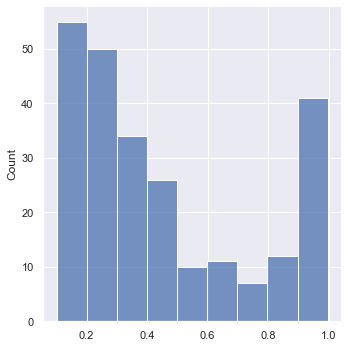

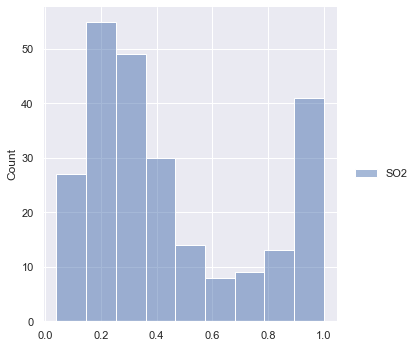

In [70]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_so2)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

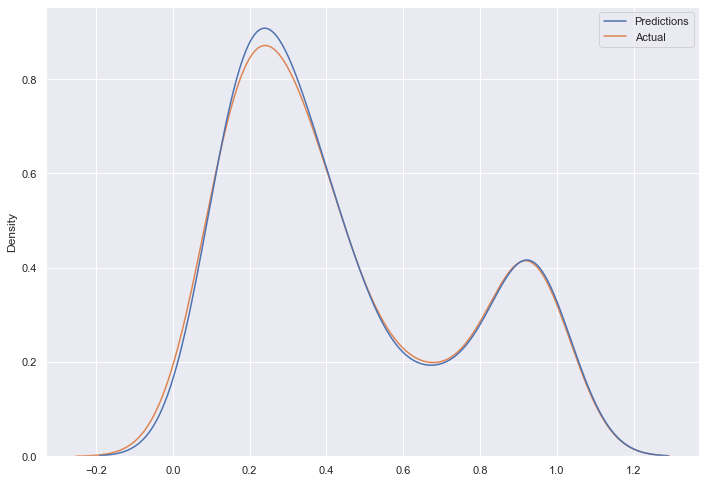

In [71]:
results = pd.DataFrame(predictions_so2, columns = ['Predictions'])
results["Actual"] = list(y_test["SO2"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### CO

In [72]:
data_co = pd.DataFrame()
data_co["month"] = bidhannagar["month"]
data_co["week"] = bidhannagar["week"]
data_co["week_day"] = bidhannagar["week_day"]
data_co["CO"] = bidhannagar["CO"]
cols = data_co.columns
data_co.head()

,month,week,week_day,CO
0,8,34,2,0.25
1,8,34,3,0.18
2,8,34,4,0.20
3,8,34,5,0.18
4,8,34,6,0.18


In [73]:
# shuffling the data set
data_co = data_co.sample(frac=1).reset_index()
data_co = data_co.drop('index', axis=1)
data_co.head()

,month,week,week_day,CO
0,11,46,3,0.78
1,10,44,1,0.71
2,9,38,3,0.41
3,11,46,0,0.59
4,8,32,4,0.83


In [74]:
duplicate_co = data_co.copy()

In [75]:
#normalizing the dataset
data_co = preprocessing.normalize(data_co,norm='l2')
data_co = pd.DataFrame(data_co, columns=cols)

In [76]:
X_co = data_co.drop('CO', axis=1) #data basically refere to the values in the independent columns
y_co = data_co.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [77]:
X_train = X_co.head(983)
X_test = X_co.tail(246)
y_train = y_co.head(983)
y_test = y_co.tail(246)

In [78]:
bidhannagar_co_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [79]:
predictions_co = bidhannagar_co_knn.predict(X_test)

In [80]:
r2 = r2_score(y_test, predictions_co)
print('r2 score for   model is', r2)

r2 score for   model is 0.687523003318537


In [81]:
predictions_so2.shape

(246,)

In [82]:
#RSME - Root Mean Square Error
predictions5 = predictions_so2.reshape(246,1)
np.sqrt(((predictions5 - y_test)**2).mean())

CO    0.505819
dtype: float64

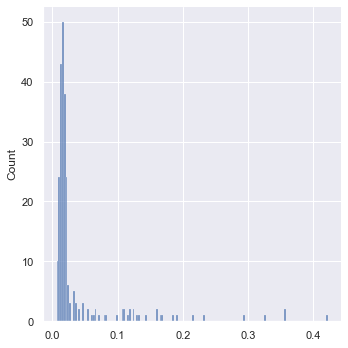

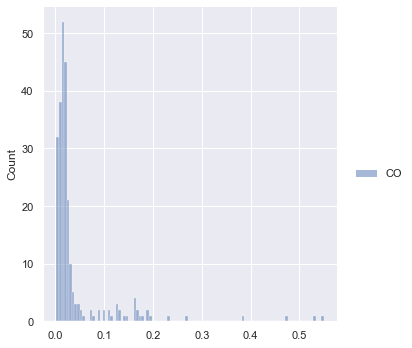

In [83]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_co)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

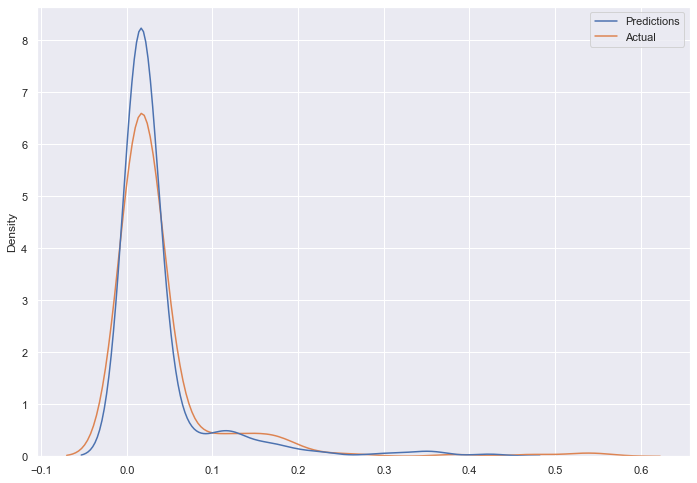

In [84]:
results = pd.DataFrame(predictions_co, columns = ['Predictions'])
results["Actual"] = list(y_test["CO"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### Ozone

In [85]:
data_ozone = pd.DataFrame()
data_ozone["month"] = bidhannagar["month"]
data_ozone["week"] = bidhannagar["week"]
data_ozone["week_day"] = bidhannagar["week_day"]
data_ozone["Ozone"] = bidhannagar["Ozone"]
cols = data_ozone.columns
data_ozone.head()

,month,week,week_day,Ozone
0,8,34,2,15.18
1,8,34,3,36.86
2,8,34,4,43.98
3,8,34,5,40.97
4,8,34,6,62.44


In [86]:
# shuffling the data set
data_ozone = data_ozone.sample(frac=1).reset_index()
data_ozone = data_ozone.drop('index', axis=1)
data_ozone.head()

,month,week,week_day,Ozone
0,9,37,1,24.94
1,7,27,2,45.33
2,10,40,6,29.04
3,5,20,2,22.88
4,8,32,0,69.13


In [87]:
duplicate_ozone = data_ozone.copy()

In [88]:
#normalizing the dataset
data_ozone = preprocessing.normalize(data_ozone,norm='l2')
data_ozone = pd.DataFrame(data_ozone, columns=cols)

In [89]:
X_o3 = data_ozone.drop('Ozone', axis=1) #data basically refere to the values in the independent columns
y_o3 = data_ozone.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [90]:
X_train = X_o3.head(983)
X_test = X_o3.tail(246)
y_train = y_o3.head(983)
y_test = y_o3.tail(246)

In [91]:
bidhannagar_ozone_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [92]:
predictions_ozone = bidhannagar_ozone_knn.predict(X_test)

In [93]:
r2 = r2_score(y_test, predictions_ozone)
print('r2 score for   model is', r2)

r2 score for   model is 0.9971441633459286


In [94]:
predictions_ozone.shape

(246,)

In [95]:
#RSME - Root Mean Square Error
predictions5 = predictions_ozone.reshape(246,1)
np.sqrt(((predictions5 - y_test)**2).mean())

Ozone    0.012007
dtype: float64

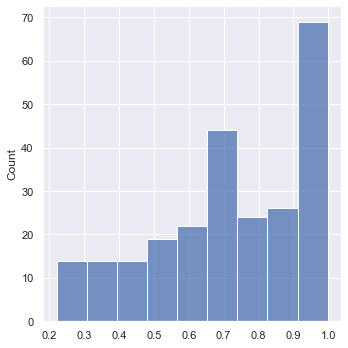

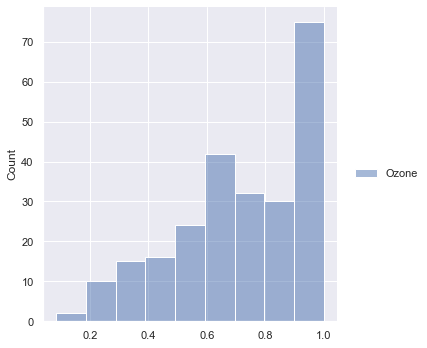

In [96]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_ozone)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

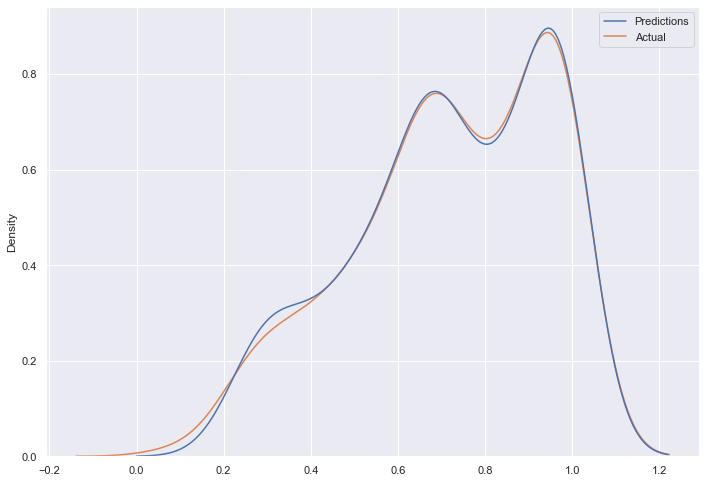

In [97]:
results = pd.DataFrame(predictions_ozone, columns = ['Predictions'])
results["Actual"] = list(y_test["Ozone"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### AQI

In [98]:
data_aqi = pd.DataFrame()
data_aqi["month"] = bidhannagar["month"]
data_aqi["week"] = bidhannagar["week"]
data_aqi["week_day"] = bidhannagar["week_day"]
data_aqi["AQI"] = bidhannagar["AQI"]
cols = data_aqi.columns
data_aqi.head()

,month,week,week_day,AQI
0,8,34,2,200.59
1,8,34,3,103.86
2,8,34,4,200.59
3,8,34,5,297.32
4,8,34,6,62.44


In [99]:
# shuffling the data set
data_aqi = data_aqi.sample(frac=1).reset_index()
data_aqi = data_aqi.drop('index', axis=1)
data_aqi.head()

,month,week,week_day,AQI
0,2,8,5,129.20
1,7,30,6,43.65
2,3,13,3,54.91
3,9,39,4,78.06
4,8,35,2,35.41


In [100]:
duplicate_aqi = data_aqi.copy()

In [101]:
#normalizing the dataset
data_aqi = preprocessing.normalize(data_aqi,norm='l2')
data_aqi = pd.DataFrame(data_aqi, columns=cols)

In [102]:
X_aqi = data_aqi.drop('AQI', axis=1) #data basically refere to the values in the independent columns
y_aqi = data_aqi.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [103]:
X_train = X_aqi.head(983)
X_test = X_aqi.tail(246)
y_train = y_aqi.head(983)
y_test = y_aqi.tail(246)

In [104]:
bidhannagar_aqi_knn = model_knn.fit(X_train, np.ravel(y_train,order='C'))

In [105]:
predictions_aqi = bidhannagar_aqi_knn.predict(X_test)

In [106]:
r2 = r2_score(y_test, predictions_aqi)
print('r2 score for   model is', r2)

r2 score for   model is 0.9987015387901763


In [107]:
predictions_aqi.shape

(246,)

In [108]:
predictions3 = predictions_aqi.reshape(246,1)
np.sqrt(((predictions3 - y_test)**2).mean())

AQI    0.005216
dtype: float64

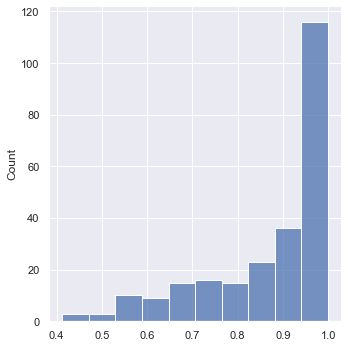

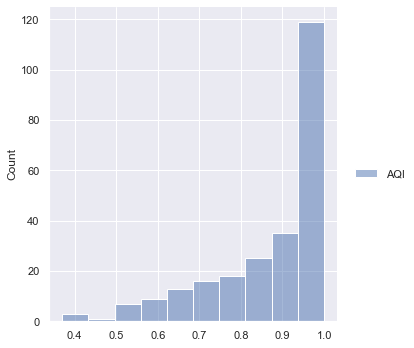

In [109]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_aqi)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

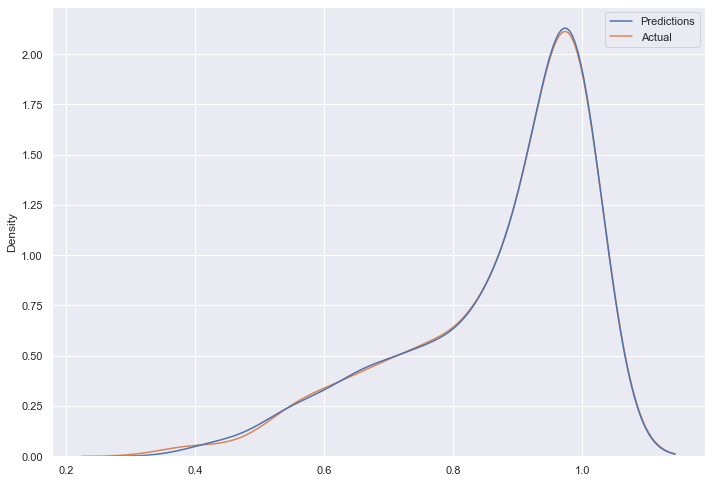

In [110]:
results = pd.DataFrame(predictions_aqi, columns = ['Predictions'])
results["Actual"] = list(y_test["AQI"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### Prediction Functions

In [111]:
##1. PM2.5 Sub-Index calculation
def PM25(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

##2. PM10 Sub-Index calculation
def PM10(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

##3. NO2 Sub-Index calculation
def NO2(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0


##4. NH3 Sub-Index calculation
def NH3(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

##5. SO2 Sub-Index calculation
def SO2(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

##6. CO Sub-Index calculation
def CO(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

##7. O3 Sub-Index calculation
def O3(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

In [112]:
def aqi(l):
    final = max(PM25(l[0]),PM10(l[1]),NO2(l[2]),NH3(l[3]),SO2(l[4]),CO(l[5]),O3(l[6]))
    if final >=0 and final<=50:
        return([round(final,2),"Good"])
    elif final>50 and final<=100:
        return([round(final,2),"Satisfactory"])
    elif final>100 and final<= 200:
        return([round(final,2),"Moderately Polluted"])
    elif final>200 and final<=300:
        return([round(final,2),"Poor"])
    elif final>300 and final<=400:
        return([round(final,2),"Very poor"])
    elif final>400:
        return([round(final,2),"Severe"])

In [113]:
def predictor_pm25(query, model_pm25,data_pm25,X):
    results = [] 
    location = data_pm25.loc[(data_pm25['month'] == query[0]) & (data_pm25['week'] == query[1]) & (data_pm25['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_pm25.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_pm25.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_pm10(query, model_pm10,data_pm10,X):
    results = [] 
    location = data_pm10.loc[(data_pm10['month'] == query[0]) & (data_pm10['week'] == query[1]) & (data_pm10['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_pm10.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_pm10.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_no2(query, model_no2, data_no2,X):
    results = []
    location = data_no2.loc[(data_no2['month'] == query[0]) & (data_no2['week'] == query[1]) & (data_no2['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_no2.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_no2.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_nh3(query, model_nh3, data_nh3,X):
    results = [] 
    location = data_nh3.loc[(data_nh3['month'] == query[0]) & (data_nh3['week'] == query[1]) & (data_nh3['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_nh3.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_nh3.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_so2(query, model_so2,data_so2,X):
    results = [] 
    location = data_so2.loc[(data_so2['month'] == query[0]) & (data_so2['week'] == query[1]) & (data_so2['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_so2.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_so2.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_co(query, model_co,data_co,X):
    results = [] 
    location = data_co.loc[(data_co['month'] == query[0]) & (data_co['week'] == query[1]) & (data_co['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_co.predict(np.array(query).reshape(1,-1)))
    return(sum(results) / len(results))

def predictor_o3(query, model_o3,data_o3,X):
    results = []
    location = data_o3.loc[(data_o3['month'] == query[0]) & (data_o3['week'] == query[1]) & (data_o3['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_o3.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_o3.loc[l]**2)))
    return(sum(results) / len(results))

In [114]:
def precal(date, model_pm25,model_pm10,model_no2,model_nh3,model_so2,model_co,model_o3,data_pm25,data_pm10,data_no2, data_nh3,data_so2,data_co,data_o3,X_pm25,X_pm10,X_no2,X_nh3,X_so2,X_co,X_o3):
    query = []
    result = []
    date = pd.DataFrame(date)
    date[0] = pd.to_datetime(date[0],format="%Y-%m-%d")
    query.append(list(date[0].dt.month)[0])
    query.append(list(date[0].dt.strftime('%V').astype('int64'))[0])
    query.append(list(date[0].dt.weekday)[0])
    result.append(predictor_pm25(query,model_pm25, data_pm25,X_pm25))
    result.append(predictor_pm10(query,model_pm10, data_pm10,X_pm10))
    result.append(predictor_no2(query,model_no2, data_no2,X_no2))
    result.append(predictor_nh3(query,model_nh3, data_nh3,X_nh3))
    result.append(predictor_so2(query,model_so2, data_so2,X_so2))
    result.append(predictor_co(query,model_co, data_co,X_co))
    result.append(predictor_o3(query,model_o3, data_o3,X_o3))
    ans = aqi(result)
    print("Expected:-\nPM 2.5: " + str(result[0])+"\nPM 10: " + str(result[1])+"\nNO2: " + str(result[2])+"\nNH3: " + str(result[3])+"\nSO2: " + str(result[4])+"\nCO: " + str(result[5])+"\nO3: " + str(result[6]))
    print("\nThe AQI value is expected to be arouynd " + str(ans[0]) + " and the index is expected to be " + ans[1])
    

In [115]:
warnings.filterwarnings(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category
warnings.filterwarnings(action='ignore', category=UserWarning) # setting ignore as a parameter and further adding category
precal(["2019-08-30"],bidhannagar_pm25_knn,bidhannagar_pm10_model_knn,bidhannagar_no2_knn,bidhannagar_nh3_knn,bidhannagar_so2_knn,bidhannagar_co_knn,bidhannagar_ozone_knn,duplicate_pm25,duplicate_pm10,duplicate_no2,duplicate_nh3,duplicate_so2,duplicate_co,duplicate_ozone,X_pm25,X_pm10,X_no2,X_nh3,X_so2,X_co,X_o3)

Expected:-
PM 2.5: [15.25714757]
PM 10: [29.06984207]
NO2: [15.07802016]
NH3: [15.10191565]
SO2: [14.92929821]
CO: [0.38679413]
O3: [25.24123565]

The AQI value is expected to be arouynd 29.07 and the index is expected to be Good
